In [1]:
import pandas as pd
import spacy
import spacy.cli
import re
from collections import Counter

In [2]:
# Luego de un vistaso al dataset, la mayoria de tweets están en ingles, entonces uso la version en
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
nlp = spacy.load("en_core_web_md")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
spam_str_path = "/content/drive/MyDrive/tweets/tw_source.csv"
dataset = pd.read_csv(spam_str_path, encoding='latin-1', header=None)
dataset.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
dataset.shape

(1600000, 6)

In [7]:
content_col = dataset[5]
content_col

,5
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."
...,...
1599995,Just woke up. Having no school is the best fee...
1599996,TheWDB.com - Very cool to hear old Walt interv...
1599997,Are you ready for your MoJo Makeover? Ask me f...
1599998,Happy 38th Birthday to my boo of alll time!!! ...


### **Obtener a los más mencionados**
---

In [8]:
def get_most_mentioned_people(tweets):
  # Uso counter, que está diseñado para estos casos
  # Leer más en: https://docs.python.org/3/library/collections.html#collections.Counter
  counter = Counter()

  regex = r'@[A-Za-z0-9_]+'

  for tweet in tweets:
    mentions = re.findall(regex, tweet)
    counter.update(mentions)

  return counter.most_common(3)

In [9]:
get_most_mentioned_people(content_col)

[('@mileycyrus', 4500), ('@tommcfly', 3887), ('@ddlovato', 3467)]

In [10]:
# versión sin librerias de la funcion
def get_most_mentioned_people_handmade(tweets):
    mention_counts = {}

    regex = r'@[A-Za-z0-9_]+'

    for tweet in tweets:
        mentions = re.findall(regex, tweet)
        for mention in mentions:
            if mention in mention_counts:
                mention_counts[mention] += 1
            else:
                mention_counts[mention] = 1

    sorted_mentions = sorted(mention_counts.items(), key=lambda x: x[1], reverse=True)
    top_mentions = sorted_mentions[:3]

    return top_mentions

In [11]:
# Al final, obtenemos lo mismo
get_most_mentioned_people_handmade(content_col)

[('@mileycyrus', 4500), ('@tommcfly', 3887), ('@ddlovato', 3467)]

### **Filtrar solo tweets que contengan a cada usuario y hacer datasets**
---

In [12]:
# Hago 3 datasets, uno para cada uno de los usuarios más mencionados
# Uso el método str.contains() ya incluido en pandas

filtered_df_mileycyrus = dataset[dataset[5].str.contains(r'(^|\s)@mileycyrus(\s|$)')]
filtered_df_mileycyrus.head()

<ipython-input-12-65876f0cbd45>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df_mileycyrus = dataset[dataset[5].str.contains(r'(^|\s)@mileycyrus(\s|$)')]


,0,1,2,3,4,5
1021,0,1468063101,Mon Apr 06 23:30:57 PDT 2009,NO_QUERY,kristenn_lynn,@mileycyrus hahaha dont be like that one time ...
2014,0,1468286517,Tue Apr 07 00:45:20 PDT 2009,NO_QUERY,nathiuria,"@mileycyrus i have the same problem, but it's ..."
2073,0,1468297110,Tue Apr 07 00:49:07 PDT 2009,NO_QUERY,amyamoore,@mileycyrus I guess counting sheep didn't work...
2080,0,1468298918,Tue Apr 07 00:49:44 PDT 2009,NO_QUERY,xdokkenx,@mileycyrus I would too if it meant spending a...
2156,0,1468318249,Tue Apr 07 00:56:41 PDT 2009,NO_QUERY,XFearLessX,@mileycyrus AWWW u seriously have the cutest d...


In [13]:
filtered_df_tommcfly = dataset[dataset[5].str.contains(r'(^|\s)@tommcfly(\s|$)')]
filtered_df_tommcfly.head()

<ipython-input-13-152e682bb9ba>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df_tommcfly = dataset[dataset[5].str.contains(r'(^|\s)@tommcfly(\s|$)')]


,0,1,2,3,4,5
1690,0,1468210813,Tue Apr 07 00:19:09 PDT 2009,NO_QUERY,mcsteph94,@tommcfly hey saw u guys play @ pushover..didn...
1789,0,1468233211,Tue Apr 07 00:26:52 PDT 2009,NO_QUERY,mcflyholland,@tommcfly Good morning Tom! Why can't I send y...
2514,0,1468391638,Tue Apr 07 01:23:07 PDT 2009,NO_QUERY,ckstarlet,@tommcfly did you know that johnsons baby use ...
3029,0,1468502040,Tue Apr 07 02:03:41 PDT 2009,NO_QUERY,McFLYBelgium,"@dougiemcfly @tommcfly good morning guys, how ..."
3524,0,1468618787,Tue Apr 07 02:46:02 PDT 2009,NO_QUERY,lilmissvik,"@tommcfly hey, no chance of adding brighton or..."


In [14]:
filtered_df_ddlovato = dataset[dataset[5].str.contains(r'(^|\s)@ddlovato(\s|$)')]
filtered_df_ddlovato.head()

<ipython-input-14-b2d6ab432e0e>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df_ddlovato = dataset[dataset[5].str.contains(r'(^|\s)@ddlovato(\s|$)')]


,0,1,2,3,4,5
460,0,1467929230,Mon Apr 06 22:51:34 PDT 2009,NO_QUERY,toritor11,@ddlovato @David_Henrie ummmmm i cant find it.
573,0,1467953367,Mon Apr 06 22:58:30 PDT 2009,NO_QUERY,lovatolover,@ddlovato Do you hate us?? Please don't
7032,0,1469661950,Tue Apr 07 07:02:58 PDT 2009,NO_QUERY,mariapersson,@ddlovato Wish that i could see it.. Thats th...
7089,0,1469674492,Tue Apr 07 07:05:11 PDT 2009,NO_QUERY,xxBEJEALOUSxx,"@ddlovato hey demi, wen are you and selena gon..."
8611,0,1548280868,Fri Apr 17 20:31:31 PDT 2009,NO_QUERY,Julie_Dances,@ddlovato ahhhh i wish i could go to the dalla...


### **Hacer los corpus**
---

In [15]:
corpus_mileycyrus = pd.DataFrame({
    'Content': filtered_df_mileycyrus[5],
    'ID': filtered_df_mileycyrus[1],
    'Timestamp': filtered_df_mileycyrus[2],
    'Length': filtered_df_mileycyrus[5].apply(len)
})

corpus_mileycyrus.head()

,Content,ID,Timestamp,Length
1021,@mileycyrus hahaha dont be like that one time ...,1468063101,Mon Apr 06 23:30:57 PDT 2009,107
2014,"@mileycyrus i have the same problem, but it's ...",1468286517,Tue Apr 07 00:45:20 PDT 2009,137
2073,@mileycyrus I guess counting sheep didn't work...,1468297110,Tue Apr 07 00:49:07 PDT 2009,72
2080,@mileycyrus I would too if it meant spending a...,1468298918,Tue Apr 07 00:49:44 PDT 2009,100
2156,@mileycyrus AWWW u seriously have the cutest d...,1468318249,Tue Apr 07 00:56:41 PDT 2009,112


In [16]:
corpus_tommcfly = pd.DataFrame({
    'Content': filtered_df_tommcfly[5],
    'ID': filtered_df_tommcfly[1],
    'Timestamp': filtered_df_tommcfly[2],
    'Length': filtered_df_tommcfly[5].apply(len)
})

corpus_tommcfly.head()

,Content,ID,Timestamp,Length
1690,@tommcfly hey saw u guys play @ pushover..didn...,1468210813,Tue Apr 07 00:19:09 PDT 2009,138
1789,@tommcfly Good morning Tom! Why can't I send y...,1468233211,Tue Apr 07 00:26:52 PDT 2009,131
2514,@tommcfly did you know that johnsons baby use ...,1468391638,Tue Apr 07 01:23:07 PDT 2009,96
3029,"@dougiemcfly @tommcfly good morning guys, how ...",1468502040,Tue Apr 07 02:03:41 PDT 2009,108
3524,"@tommcfly hey, no chance of adding brighton or...",1468618787,Tue Apr 07 02:46:02 PDT 2009,131


In [17]:
corpus_ddlovato = pd.DataFrame({
    'Content': filtered_df_ddlovato[5],
    'ID': filtered_df_ddlovato[1],
    'Timestamp': filtered_df_ddlovato[2],
    'Length': filtered_df_ddlovato[5].apply(len)
})

corpus_ddlovato.head()

,Content,ID,Timestamp,Length
460,@ddlovato @David_Henrie ummmmm i cant find it.,1467929230,Mon Apr 06 22:51:34 PDT 2009,47
573,@ddlovato Do you hate us?? Please don't,1467953367,Mon Apr 06 22:58:30 PDT 2009,40
7032,@ddlovato Wish that i could see it.. Thats th...,1469661950,Tue Apr 07 07:02:58 PDT 2009,96
7089,"@ddlovato hey demi, wen are you and selena gon...",1469674492,Tue Apr 07 07:05:11 PDT 2009,79
8611,@ddlovato ahhhh i wish i could go to the dalla...,1548280868,Fri Apr 17 20:31:31 PDT 2009,85


## **NLP Pipeline**

### **1. Normalización de texto**
---

In [18]:
def normalization(docs):
  new_corpus = []
  for doc in docs:
    new_corpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n')) # RegEx para limpiar de caracteres no deseados

  return new_corpus


In [19]:
nlp_corpus_mileycyrus = corpus_mileycyrus['Content']
nlp_corpus_mileycyrus.head()

,Content
1021,@mileycyrus hahaha dont be like that one time ...
2014,"@mileycyrus i have the same problem, but it's ..."
2073,@mileycyrus I guess counting sheep didn't work...
2080,@mileycyrus I would too if it meant spending a...
2156,@mileycyrus AWWW u seriously have the cutest d...


In [20]:
nlp_corpus_mileycyrus = normalization(nlp_corpus_mileycyrus)

In [21]:
nlp_corpus_tommcfly = filtered_df_tommcfly[5]
nlp_corpus_tommcfly.head()

,5
1690,@tommcfly hey saw u guys play @ pushover..didn...
1789,@tommcfly Good morning Tom! Why can't I send y...
2514,@tommcfly did you know that johnsons baby use ...
3029,"@dougiemcfly @tommcfly good morning guys, how ..."
3524,"@tommcfly hey, no chance of adding brighton or..."


In [22]:
nlp_corpus_tommcfly = normalization(nlp_corpus_tommcfly)

In [23]:
nlp_corpus_ddlovato = filtered_df_ddlovato[5]
nlp_corpus_ddlovato.head()

,5
460,@ddlovato @David_Henrie ummmmm i cant find it.
573,@ddlovato Do you hate us?? Please don't
7032,@ddlovato Wish that i could see it.. Thats th...
7089,"@ddlovato hey demi, wen are you and selena gon..."
8611,@ddlovato ahhhh i wish i could go to the dalla...


In [24]:
nlp_corpus_ddlovato = normalization(nlp_corpus_ddlovato)

### **2. Tokenización**
---

In [25]:
def tokenization(docs):
  new_corpus = []
  for doc in docs:
    new_corpus.append(nlp(doc)) # Uso el modelo de lenguaje que cargué al principio

  return new_corpus

In [26]:
nlp_corpus_mileycyrus = tokenization(nlp_corpus_mileycyrus)
nlp_corpus_mileycyrus[0]

mileycyrus hahaha dont be like that one time in ny when you got 30 mins of sleep then got sick  love you

In [27]:
nlp_corpus_tommcfly = tokenization(nlp_corpus_tommcfly)
nlp_corpus_tommcfly[0]

tommcfly hey saw u guys play  pushoverdidnt get 2 meet u tho cuz of th huge line  i was very upset  lola msg would make up 4 it

In [28]:
nlp_corpus_ddlovato = tokenization(nlp_corpus_ddlovato)
nlp_corpus_ddlovato[0]

ddlovato davidhenrie ummmmm i cant find it

### **3. Remover Stop Words**
---


In [29]:
def remove_stopwords(docs):
  new_corpus = []
  for doc in docs:
    s = ''
    for token in doc:
      if(not token.is_stop):
        s = s + token.text + ' ' # En este paso lo vuelvo a pasar a string

    new_corpus.append(nlp(s.strip())) # Remover el espacio final y volver a tokenizarlo

  return new_corpus

In [30]:
nlp_corpus_mileycyrus = remove_stopwords(nlp_corpus_mileycyrus)
nlp_corpus_mileycyrus[0]

mileycyrus hahaha nt like time ny got 30 mins sleep got sick   love

In [31]:
nlp_corpus_tommcfly = remove_stopwords(nlp_corpus_tommcfly)
nlp_corpus_tommcfly[0]

tommcfly hey saw u guys play   pushoverdidnt 2 meet u tho cuz th huge line   upset   lola msg 4

In [32]:
nlp_corpus_ddlovato = remove_stopwords(nlp_corpus_ddlovato)
nlp_corpus_ddlovato[0]

ddlovato davidhenrie ummmmm nt find

### **4. Word Stemming y Lemmatization**
---

In [33]:
def stemming_lemmating(docs):
  new_corpus = []
  for doc in docs:
    s = ''
    for token in doc:
      if(not token.is_stop):
        s = s + token.lemma_ + ' ' # En este paso lo vuelvo a pasar a string y uso lemma_

    new_corpus.append(s.strip()) # Ya no tokenizo, solo paso la palabra a una lista de salida

  return new_corpus

In [34]:
nlp_corpus_mileycyrus = stemming_lemmating(nlp_corpus_mileycyrus)
nlp_corpus_mileycyrus[0]

'mileycyrus hahaha not like time ny get 30 min sleep get sick    love'

In [35]:
nlp_corpus_tommcfly = stemming_lemmating(nlp_corpus_tommcfly)
nlp_corpus_tommcfly[0]

'tommcfly hey see u guy play    pushoverdidnt 2 meet u tho cuz th huge line    upset    lola msg 4'

In [36]:
nlp_corpus_ddlovato = stemming_lemmating(nlp_corpus_ddlovato)
nlp_corpus_ddlovato[0]

'ddlovato davidhenrie ummmmm not find'

### **5. Generar el wordcloud**
---


In [37]:
def corpus_to_str(docs):
  str_out = ''

  for doc in docs:
    str_out = str_out + doc + ''

  return str_out

In [ ]:
str_corpus_mileycyrus = corpus_to_str(nlp_corpus_mileycyrus)

In [ ]:
str_corpus_tommcfly = corpus_to_str(nlp_corpus_tommcfly)

In [ ]:
str_corpus_ddlovato = corpus_to_str(nlp_corpus_ddlovato)

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [42]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=15).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')
    plt.show()

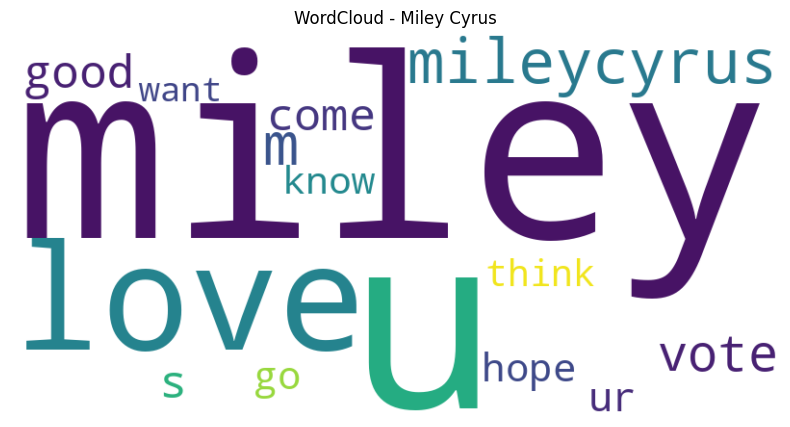

In [43]:
generate_wordcloud(str_corpus_mileycyrus, "WordCloud - Miley Cyrus")

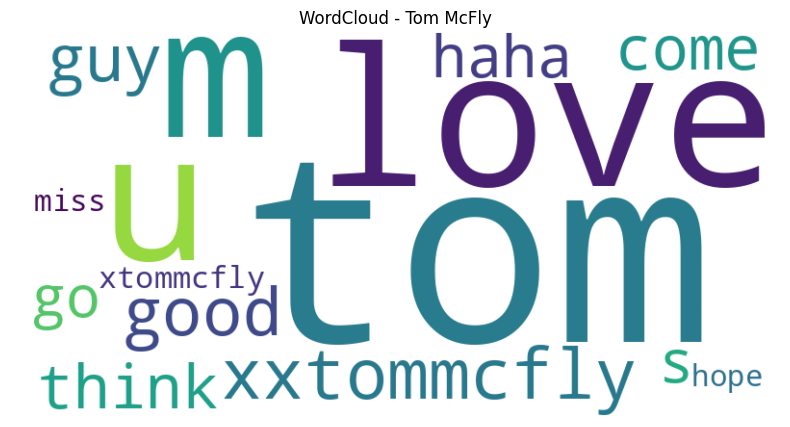

In [44]:
generate_wordcloud(str_corpus_tommcfly, "WordCloud - Tom McFly")

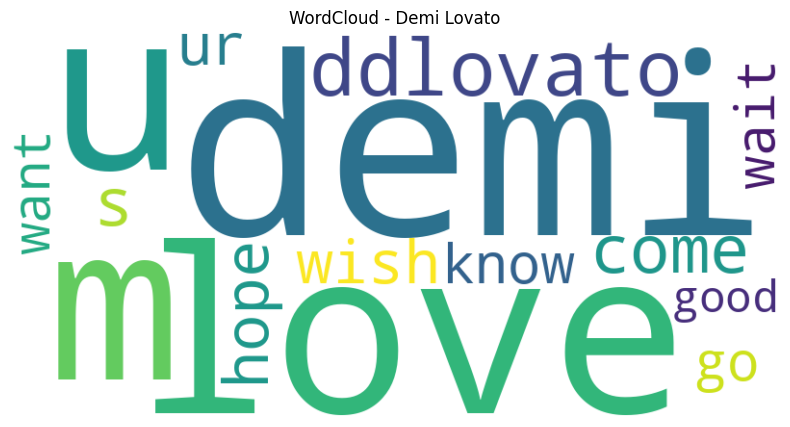

In [45]:
generate_wordcloud(str_corpus_ddlovato, "WordCloud - Demi Lovato")

### **¿Por qué son citados?**
---

Estas 3 personas son artistas, y evaluando las palabras que aparecen en el wordcloud, es porque tienen una gran fanbase, que les expresan su cariño y su deseo de que vayan, seguramente a dar conciertos a sus países.